In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
X, y = make_classification(n_samples=80000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train,
                                                            y_train,
                                                            test_size=0.5)

In [3]:

def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=20, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
keras_model = build_model()
keras_model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=1)

Epoch 1/10
200/200 [==============================] - 1s 2ms/step - loss: 0.5358 - accuracy: 0.7315
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2000 - accuracy: 0.9328
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1977 - accuracy: 0.9291
Epoch 4/10
200/200 [==============================] - ETA: 0s - loss: 0.1913 - accuracy: 0.93 - 0s 2ms/step - loss: 0.1916 - accuracy: 0.9326
Epoch 5/10
200/200 [==============================] - 0s 1ms/step - loss: 0.1888 - accuracy: 0.9350
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1858 - accuracy: 0.9372
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1820 - accuracy: 0.9363
Epoch 8/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1862 - accuracy: 0.9358
Epoch 9/10
200/200 [==============================] - 0s 1ms/step - loss: 0.1858 - accuracy: 0.9365
Epoch 10/10
200/200 [==============================] - 0s 

In [4]:
from sklearn.metrics import roc_curve
y_pred_keras = keras_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [5]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [6]:
from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

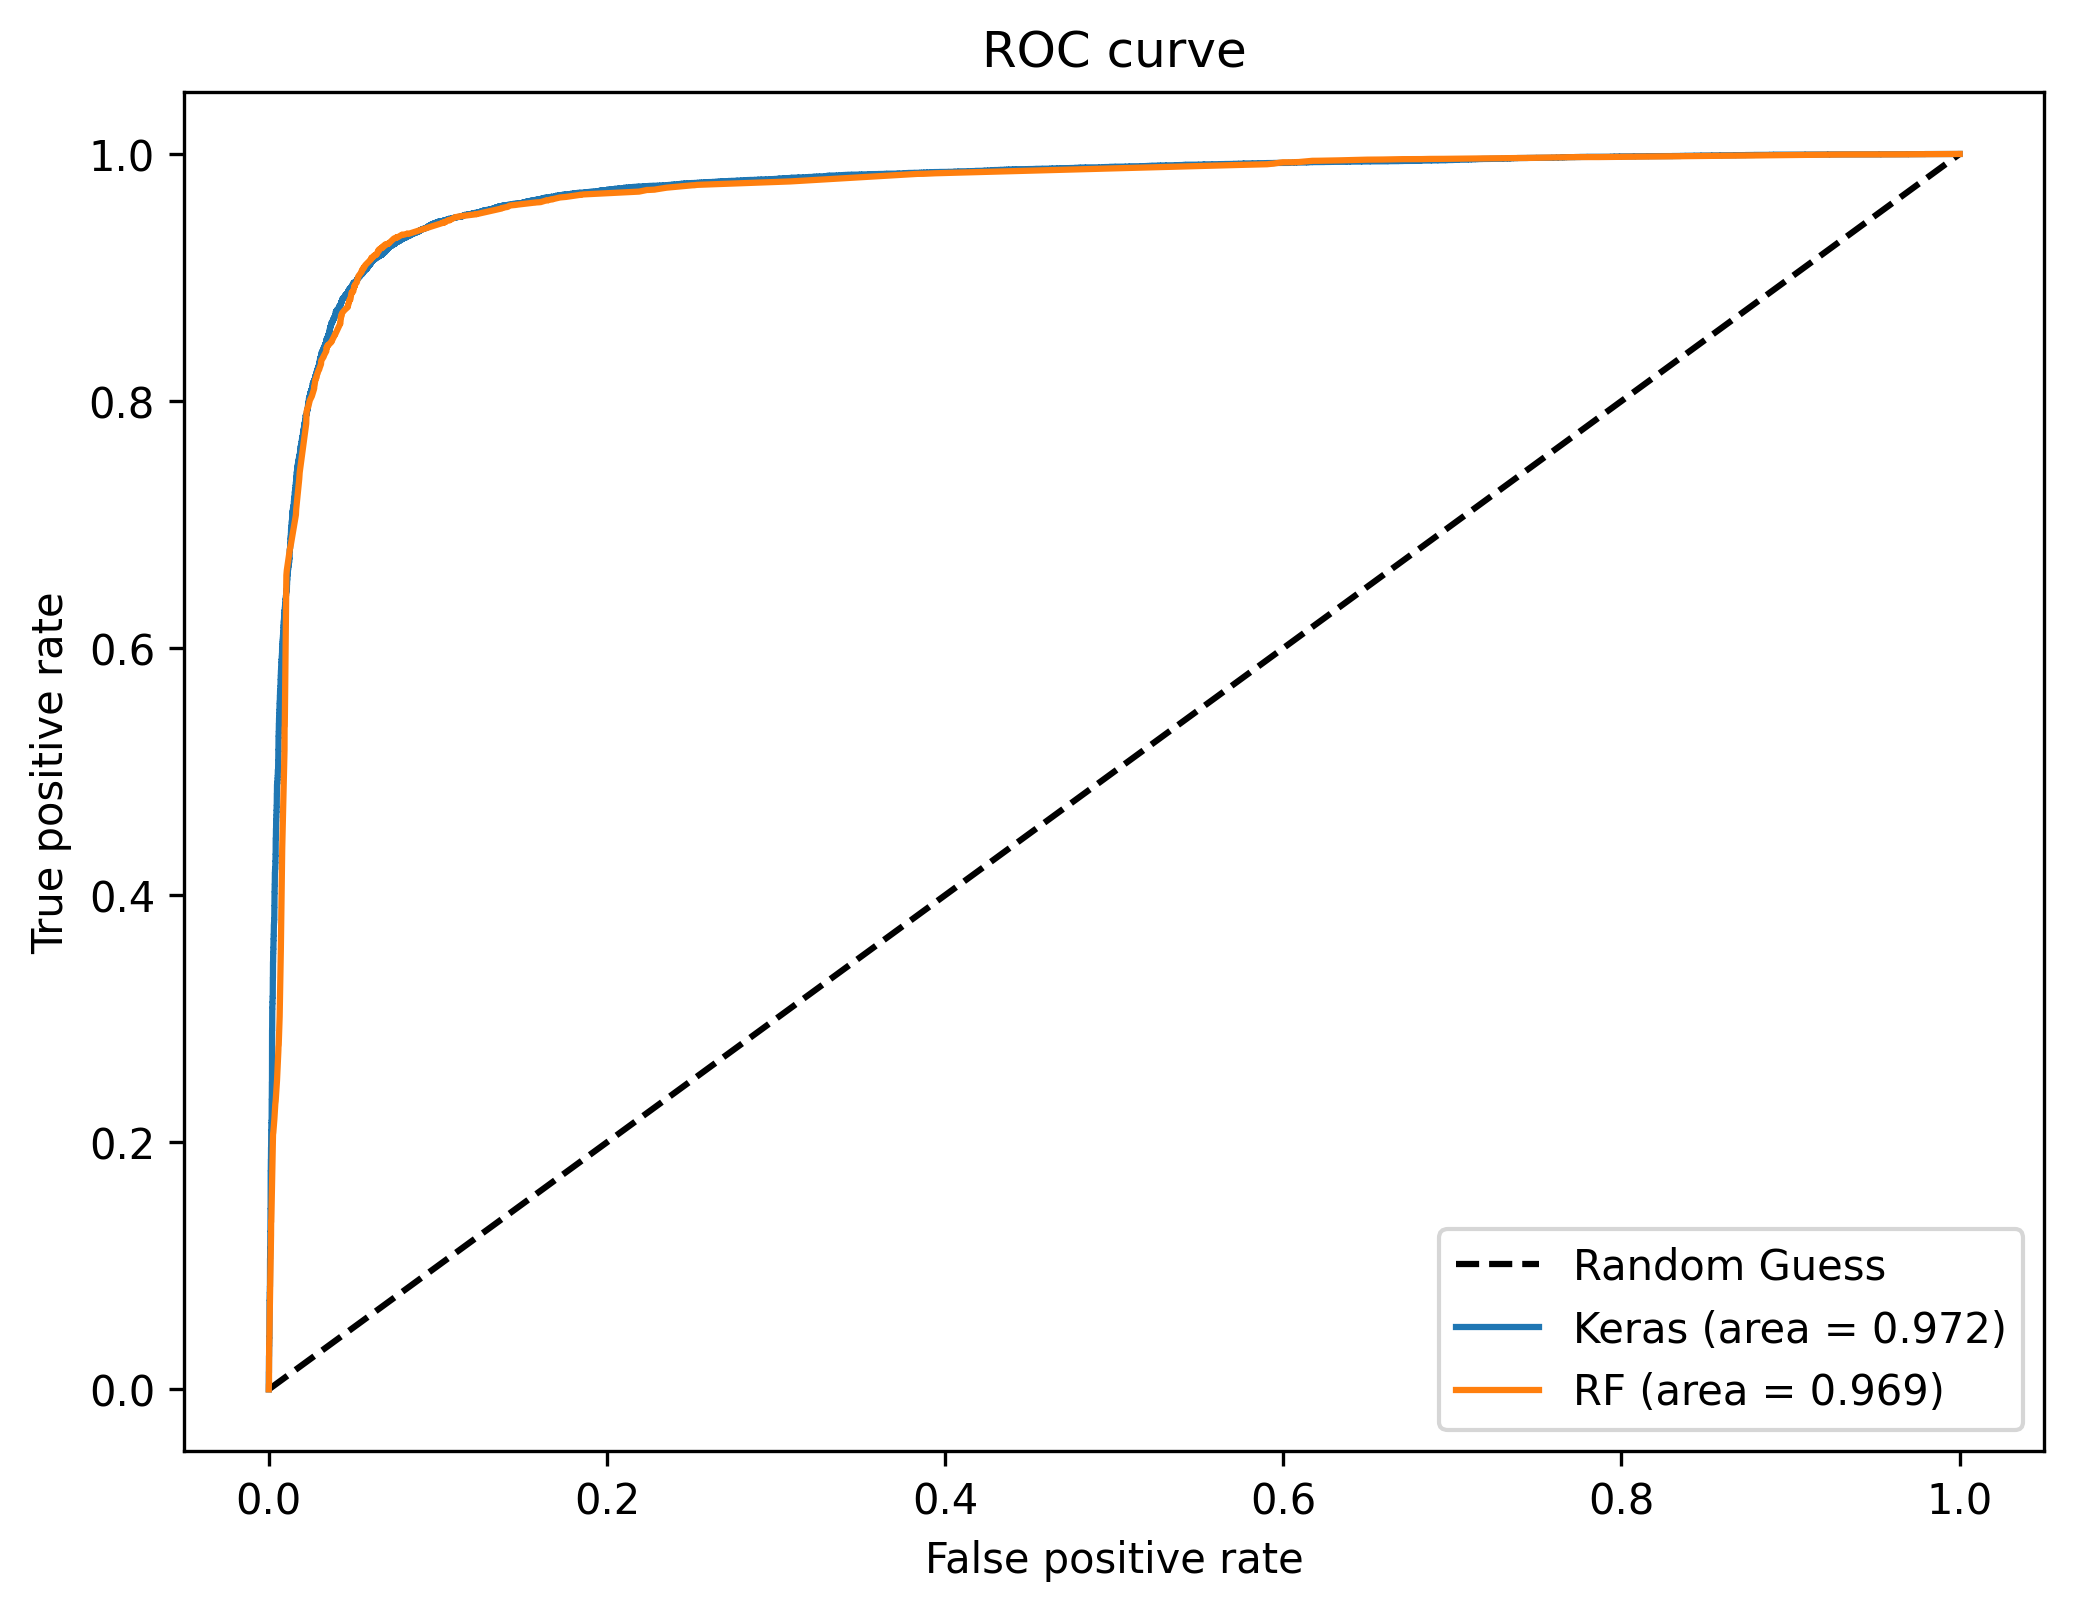

In [7]:
import matplotlib.pylab as plt  
fig= plt.figure(figsize=(8,6),dpi=300)
plt.plot([0, 1], [0, 1], 'k--',label="Random Guess")
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [38]:
x = np.random.randn(100,64,64,3)
x = np.where(x<=0,0,x)
x = np.where(x >=255,255,x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


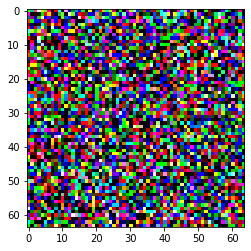

In [39]:
plt.imshow(x[0])

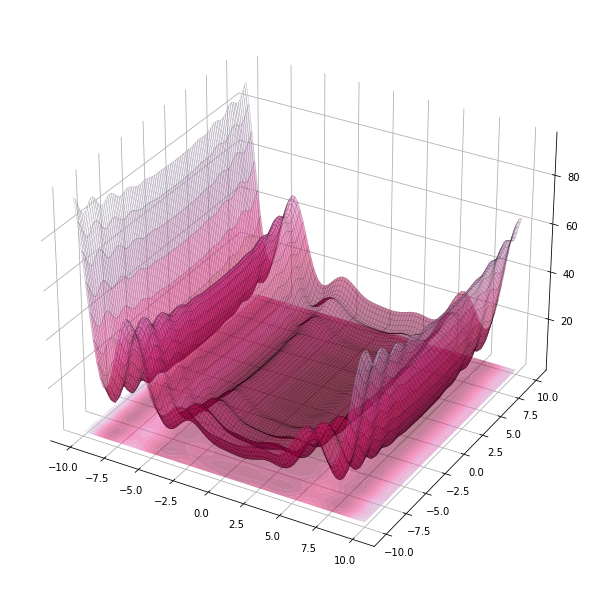

In [42]:
from yabox.problems import Levy
problem = Levy()
problem.plot3d()


In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys

# Load Yabox (from local)
# Comment this line to use the installed version
sys.path.insert(0, '../')

import yabox as yb

# Import the DE implementations
from yabox.algorithms import DE, PDE
print('Yabox version: ', yb.__version__)

Yabox version:  1.1.0


In [48]:
DE(lambda x: sum(x**2) + 1, [(-10, 10)] * 5, maxiters=10000).solve(show_progress=True)

Optimizing (DE):   0%|          | 0/10000 [00:00<?, ?it/s]

(array([[ 3.46719276e-09, -8.15481016e-09,  5.30075539e-10,
          6.22062402e-10,  1.46590118e-09]]),
 1.0)

In [49]:
def create_loss(p1, p2, p3):
    # Prepare here whatever you need. Load parameters,
    # read from file, etc
    a = p1 * p2
    b = p2 / p3
    # Define the function to be optimized as an inner function
    # that can make use of the other parameters
    def f(x):
        return 1 + a*x - b*x**2 + 0.01*x**3 + 0.001 * x**4
    return f

f = create_loss(5, 2, 0.1)
f(0)

1.0

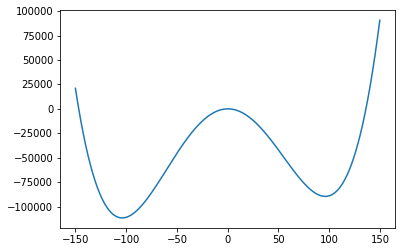

In [52]:
x = np.arange(-150, 150, 0.1)
plt.plot(x, f(x));

In [53]:
xo, yo = DE(f, [(-150, 150)], maxiters=1000).solve(show_progress=True)
xo, yo

Optimizing (DE):   0%|          | 0/1000 [00:00<?, ?it/s]

(array([[-103.94038022]]), array([-111621.9322605]))

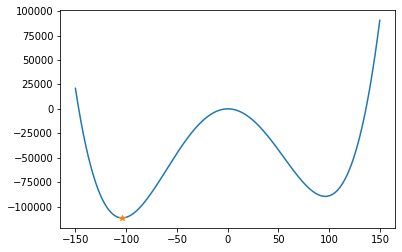

In [54]:
fig, ax = plt.subplots()
ax.plot(x, f(x));
ax.plot(xo[0][0], yo[0], '*')

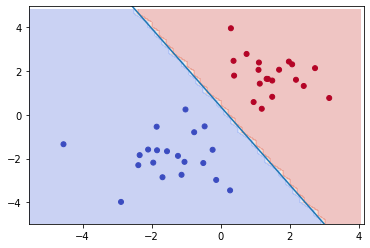

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

fig, ax = plt.subplots()
clf2 = svm.LinearSVC(C=1).fit(X, Y)

# get the separating hyperplane
w = clf2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf2.intercept_[0]) / w[1]

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                     np.arange(y_min, y_max, .2))
Z = clf2.predict(np.c_[xx2.ravel(), yy2.ravel()])

Z = Z.reshape(xx2.shape)
ax.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, s=25)
ax.plot(xx,yy)

ax.axis([x_min, x_max,y_min, y_max])
plt.show()


In [61]:
x  =  np.random.rand(30,30)

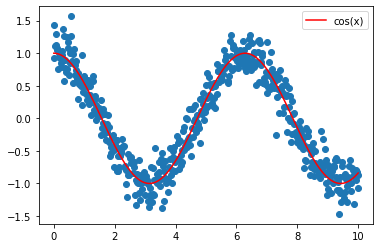

In [70]:
x = np.linspace(0, 10, 500)
y = np.cos(x) + np.random.normal(0, 0.2, 500)
plt.scatter(x, y)
plt.plot(x, np.cos(x), label='cos(x)',color="red")
plt.legend()

In [71]:
def fmodel(x, w):
    return w[0] + w[1]*x + w[2] * x**2 + w[3] * x**3 + w[4] * x**4 + w[5] * x**5


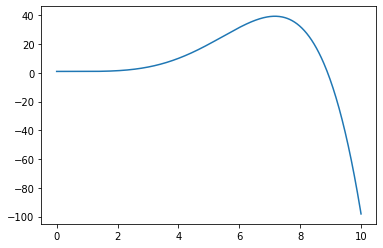

In [72]:
plt.plot(x, fmodel(x, [1.0, -0.01, 0.01, -0.1, 0.1, -0.01]))

In [75]:
def de(fobj, bounds, mut=0.8, crossp=0.7, popsize=20, its=1000):
    dimensions = len(bounds)
    pop = np.random.rand(popsize, dimensions)
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    pop_denorm = min_b + pop * diff
    fitness = np.asarray([fobj(ind) for ind in pop_denorm])
    best_idx = np.argmin(fitness)
    best = pop_denorm[best_idx]
    for i in range(its):
        for j in range(popsize):
            idxs = [idx for idx in range(popsize) if idx != j]
            a, b, c = pop[np.random.choice(idxs, 3, replace = False)]
            mutant = np.clip(a + mut * (b - c), 0, 1)
            cross_points = np.random.rand(dimensions) < crossp
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            trial = np.where(cross_points, mutant, pop[j])
            trial_denorm = min_b + trial * diff
            f = fobj(trial_denorm)
            if f < fitness[j]:
                fitness[j] = f
                pop[j] = trial
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial_denorm
        yield best, fitness[best_idx]

In [73]:
def rmse(w):
    y_pred = fmodel(x, w)
    return np.sqrt(sum((y - y_pred)**2) / len(y))


In [76]:
result = list(de(rmse, [(-5, 5)] * 6, its=2000))

In [77]:
result

[(array([ 3.86002003, -3.45075993, -1.84496899,  3.07432352, -0.74262252,
          0.04199549]),
  158.59733656455003),
 (array([ 3.86002003, -3.45075993, -1.84496899,  3.07432352, -0.74262252,
          0.04199549]),
  158.59733656455003),
 (array([ 3.86002003, -3.45075993, -1.84496899,  3.07432352, -0.74262252,
          0.04199549]),
  158.59733656455003),
 (array([ 3.86002003, -3.45075993, -1.84496899,  3.07432352, -0.74262252,
          0.04199549]),
  158.59733656455003),
 (array([ 3.86002003, -3.45075993, -1.84496899,  3.07432352, -0.74262252,
          0.04199549]),
  158.59733656455003),
 (array([ 3.86002003, -3.45075993, -1.84496899,  3.07432352, -0.74262252,
          0.04199549]),
  158.59733656455003),
 (array([ 3.86002003, -3.45075993, -1.84496899,  3.07432352, -0.74262252,
          0.04199549]),
  158.59733656455003),
 (array([ 3.86002003, -3.45075993, -1.84496899,  3.07432352, -0.74262252,
          0.04199549]),
  158.59733656455003),
 (array([ 3.86002003, -3.4507599

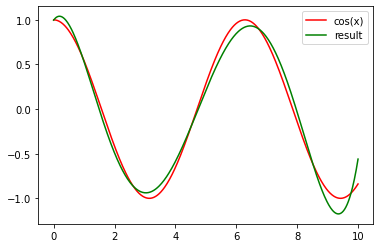

In [81]:
# plt.scatter(x, y)
plt.plot(x, np.cos(x), label='cos(x)',color="red")
w = [0.99677643, 0.47572443, -1.39088333,0.50950016, -0.06498931, 0.00273167]
plt.plot(x, fmodel(x, w), label='result',color="green")
plt.legend()
